In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read the dataset to the python environment.

In [2]:
df =  pd. read_excel('iris.xls')

df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Do necessary pre-processing steps

In [3]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()


,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Fill in all the missing values present in all the columns in the dataset

In [6]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['SL'] = df['SL'].fillna(df['SL'].median())
df['SW'] = df['SW'].fillna(df['SW'].median())
df['PL'] = df['PL'].fillna(df['PL'].median())

In [8]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

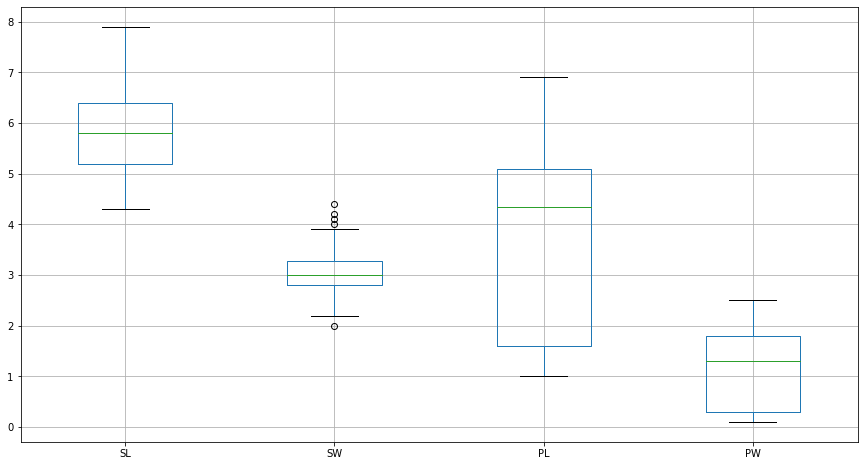

In [9]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

We can see outliers in SW

In [10]:
q1 = np.percentile(df['SW'],25,interpolation = 'midpoint')
q2 = np.percentile(df['SW'],50,interpolation = 'midpoint')
q3 = np.percentile(df['SW'],75,interpolation = 'midpoint')

iqr = q3 - q1

lowerLimit = q1 - (1.5 * iqr)
upperLimit = q3 + (1.5 * iqr)

print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2} \n IQR = {3} \n Lower Limit = {4} \n Upper Limit = {5}"
     .format(q1,q2,q3,iqr,lowerLimit,upperLimit))

 Q1 = 2.8 
 Q2 = 3.0 
 Q3 = 3.25 
 IQR = 0.4500000000000002 
 Lower Limit = 2.1249999999999996 
 Upper Limit = 3.9250000000000003


In [11]:
df['SW'].median()

3.0

In [12]:
outlier =[]

for i in df['SW']:
    if i<lowerLimit or i>upperLimit:
        outlier.append(i)
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [13]:
df.shape

(150, 5)

In [14]:
df = df[(df.SW>lowerLimit) & (df.SW<upperLimit)]

df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.shape

(145, 5)

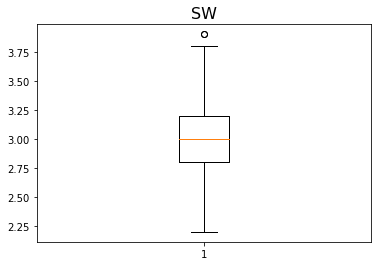

In [16]:
plt.figure()
plt.boxplot(df['SW'])
plt.title("SW",fontsize=16)
plt.show()

## Data Modeling

In [17]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
X = df.drop(['Classification'], axis=1)
y = df['Classification']
print(X.shape)
print(y.shape)

(145, 4)
(145,)


In [28]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


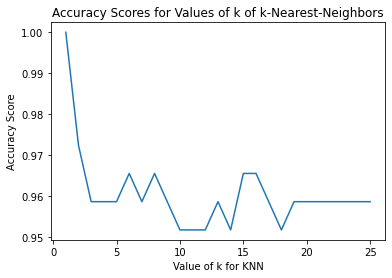

In [29]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [30]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9586206896551724


C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(87, 4)
(87,)
(58, 4)
(58,)


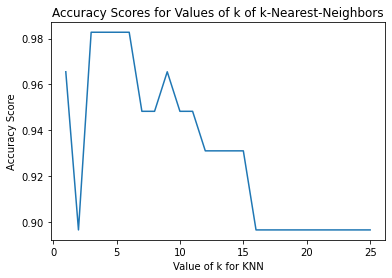

In [32]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9137931034482759


C:\Users\KARTHIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

## random forest

In [36]:
from sklearn.model_selection import train_test_split


In [38]:
X=df[['SL', 'SW', 'PL', 'SW']] 
y=df['Classification']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9318181818181818


In [48]:
species_idx = clf.predict([[3, 5, 4, 2]])[0]
print (species_idx)

Iris-versicolor


2

In [49]:
cols = df.columns
x_cols = cols[:4]
y_cols = cols[4]

X = df[x_cols]
y = df[y_cols]

train = 0.8
test = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train, test_size=test)

In [50]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
score = model.score(X_test, y_test)
percentage = score * 100
print("%.3f" % percentage, "%")

96.552 %
